### Query

In [1]:
import os

In [6]:
query = '?$filter=substringof(%2743SFR%27,Name) and Online eq true'
username = 'danyayay'
password = 'Ldy19970722'
output_doc = '../data/q.txt'

In [9]:
url_query = "https://scihub.copernicus.eu/dhus/odata/v1/Products" + query
cmd_query = f'wget --no-check-certificate --user={username} --password={password} --output-document={output_doc} "{url_query}"'
os.system(cmd_query)

0

### Download

In [18]:
id_ = '2c50ca48-661e-4163-ba0a-902c4811cf09' # offline

In [5]:
url = f"https://scihub.copernicus.eu/dhus/odata/v1/Products('{id_}')/$value"

In [6]:
os.system(f'wget --content-disposition --continue --user=danyayay --password=Ldy19970722 "{url}"')

0

In [19]:
url_online = f"https://scihub.copernicus.eu/dhus/odata/v1/Products('{id_}')/Online"

In [20]:
os.popen(f'wget --user=danyayay --password=Ldy19970722 "{url_online}"').read()

''

In [7]:
id_ = '0e37a78b-3b91-4c15-bef2-33c2082044a7' # online

In [8]:
url = f"https://scihub.copernicus.eu/dhus/odata/v1/Products('{id_}')/$value"

In [9]:
os.system(f'wget --content-disposition --continue --user=danyayay --password=Ldy19970722 "{url}"')

0

### Extract

In [36]:
with open('../data/output.txt') as f:
    lines = f.readlines()

In [46]:
query_data = ''
for l in lines:
    query_data += l

In [38]:
import re 

In [60]:
ids = re.findall('<m:properties><d:Id>(.*)</d:Id><d:Name>(.*)</d:Name>.*<d:Online>(.*)</d:Online>', query_data)

In [67]:
ids

[('e55ece38-f77a-4953-865b-d570c9997aa9',
  'S2B_MSIL2A_20210616T053639_N0300_R005_T43SFR_20210616T082742',
  'true'),
 ('5b4a6ce4-7356-4baf-974b-36335d49b367',
  'S2B_MSIL2A_20191211T053219_N0213_R105_T43SFR_20191211T085824',
  'true'),
 ('2c50ca48-661e-4163-ba0a-902c4811cf09',
  'S2A_MSIL1C_20200603T052651_N0209_R105_T43SFR_20200603T091952',
  'true'),
 ('923d53df-40d3-4df7-84c7-90d47fda5f5d',
  'S2A_MSIL1C_20210728T052651_N0301_R105_T43SFR_20210728T082347',
  'true'),
 ('8d30e360-13a5-48fe-94bc-7e746a420943',
  'S2B_MSIL2A_20210626T053639_N0300_R005_T43SFR_20210626T083628',
  'true'),
 ('9d8960ee-3882-4559-b055-4a86e94de2ba',
  'S2A_MSIL1C_20210621T053641_N0300_R005_T43SFR_20210621T075059',
  'true'),
 ('16241b12-cce4-4bf4-8e55-5a790134a1d0',
  'S2A_MSIL1C_20210807T052651_N0301_R105_T43SFR_20210807T073546',
  'true'),
 ('1b6a063d-c459-4696-8aad-1a7be0927959',
  'S2A_MSIL2A_20210621T053641_N0300_R005_T43SFR_20210621T084400',
  'true'),
 ('93b26afa-9d74-4cff-b647-a5b5e043b49e',
  'S2A

In [77]:
ids[-2][1]

'S2A_MSIL2A_20210529T052651_N0300_R105_T43SFR_20210529T075026'

In [75]:
ids[-1][1].startswith('S2A_MSIL1C_2021')

False

In [59]:
len(ids)

50

In [81]:
import os
print(os.listdir('N:/dataorg-datasets/sentinel2_images/images_danya/raw/'))

['S2A_MSIL1C_20210502T053641_N0300_R005_T43SFR_20210502T074642.zip', 'S2A_MSIL1C_20210509T052651_N0300_R105_T43SFR_20210509T074019.zip', 'S2A_MSIL1C_20201001T052651_N0209_R105_T43SFR_20201001T080756.zip', 'S2A_MSIL1C_20210412T053641_N0300_R005_T43SFR_20210412T070823.zip']


### unzip

In [8]:
import os
import zipfile

In [13]:
def unzip_products(raw_data_path, processed_data_path):
    for filename in ['q.zip', 'query.zip']:
        raw_file = raw_data_path + filename
        processed_file = processed_data_path + filename
        with zipfile.ZipFile(raw_file, 'r') as f:
            f.extractall(raw_data_path)

In [6]:
def process_data(images_path='./'):
    unzip_products(images_path, images_path)

In [14]:
process_data()

In [10]:
os.listdir('./')

['.ipynb_checkpoints', 'q.zip', 'query.zip', 'Untitled.ipynb']

### Correction

In [2]:
unzipped_data_path = 'N:/dataorg-datasets/sentinel2_images/images_danya/raw/'

In [1]:
import os, re

In [4]:
files = os.listdir(unzipped_data_path)

In [5]:
files

['S2A_MSIL1C_20200108T054221_N0208_R005_T43SFR_20200108T065352.zip',
 'S2A_MSIL1C_20200603T052651_N0209_R105_T43SFR_20200603T091952.zip',
 'S2A_MSIL1C_20201001T052651_N0209_R105_T43SFR_20201001T080756.zip',
 'S2A_MSIL1C_20210303T053731_N0209_R005_T43SFR_20210303T071456.zip',
 'S2A_MSIL1C_20210330T052641_N0300_R105_T43SFR_20210330T072750.zip',
 'S2A_MSIL1C_20210402T053641_N0300_R005_T43SFR_20210402T074229.zip',
 'S2A_MSIL1C_20210409T052641_N0300_R105_T43SFR_20210409T074750.zip',
 'S2A_MSIL1C_20210412T053641_N0300_R005_T43SFR_20210412T070823.zip',
 'S2A_MSIL1C_20210429T052641_N0300_R105_T43SFR_20210429T072359.zip',
 'S2A_MSIL1C_20210502T053641_N0300_R005_T43SFR_20210502T074642.zip',
 'S2A_MSIL1C_20210509T052651_N0300_R105_T43SFR_20210509T074019.zip',
 'S2A_MSIL1C_20210512T053641_N0300_R005_T43SFR_20210512T081347.zip',
 'S2A_MSIL1C_20210529T052651_N0300_R105_T43SFR_20210529T072625.zip',
 'S2A_MSIL1C_20210608T052651_N0300_R105_T43SFR_20210608T074116.zip',
 'S2A_MSIL1C_20210810T053641_N0301

In [8]:
[file for file in files if re.match('.*SAFE', file)]

[]

### download using `sentinelsat` packages

In [152]:
from sentinelsat import SentinelAPI

In [30]:
from sentinelsat import geojson_to_wkt

In [153]:
user = 'danyayay' 
password = 'empa.401' 
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [32]:
geojson_to_wkt(feature_collection)

'POLYGON((2.3800 57.3220,23.1940 -20.2800,-120.4300 19.1500,2.3800 57.3220))'

In [ ]:
polygon = geojson.Polygon([[(32.50, 76.10), 
                            (31.60, 76.10), 
                            (31.60, 77.10), 
                            (32.50, 77.10), 
                            (32.50, 76.10)]])
features = []
features.append(geojson.Feature(geometry=polygon, properties={"tile": "43SFR"}))
feature_collection = geojson.FeatureCollection(features)
feature_collection

In [154]:
polygon = geojson.Polygon([[(76.20, 32.40), 
                            (76.20, 31.70), 
                            (77.00, 31.70), 
                            (77.00, 32.40), 
                            (76.20, 32.40)]])
features = []
features.append(geojson.Feature(geometry=polygon, properties={"tile": "43SFR"}))
feature_collection = geojson.FeatureCollection(features)
feature_collection

{"features": [{"geometry": {"coordinates": [[[76.2, 32.4], [76.2, 31.7], [77.0, 31.7], [77.0, 32.4], [76.2, 32.4]]], "type": "Polygon"}, "properties": {"tile": "43SFR"}, "type": "Feature"}], "type": "FeatureCollection"}

In [155]:
footprint = geojson_to_wkt(polygon)

In [156]:
footprint

'POLYGON((76.2000 32.4000,76.2000 31.7000,77.0000 31.7000,77.0000 32.4000,76.2000 32.4000))'

In [162]:
products = api.query(date = ('20200101', '20200131'),
                      platformname = 'Sentinel-2',
                      processinglevel = 'Level-1C',
                      raw='tileid:43SFR',
                    )

In [164]:
len(products)

12

In [165]:
products

OrderedDict([('ff11dbc5-a2a9-4d37-ab10-dcc72d6ac75f',
              {'title': 'S2B_MSIL1C_20200130T053049_N0208_R105_T43SFR_20200130T090639',
               'link': "https://scihub.copernicus.eu/dhus/odata/v1/Products('ff11dbc5-a2a9-4d37-ab10-dcc72d6ac75f')/$value",
               'link_alternative': "https://scihub.copernicus.eu/dhus/odata/v1/Products('ff11dbc5-a2a9-4d37-ab10-dcc72d6ac75f')/",
               'link_icon': "https://scihub.copernicus.eu/dhus/odata/v1/Products('ff11dbc5-a2a9-4d37-ab10-dcc72d6ac75f')/Products('Quicklook')/$value",
               'summary': 'Date: 2020-01-30T05:30:49.024Z, Instrument: MSI, Satellite: Sentinel-2, Size: 731.54 MB',
               'ondemand': 'false',
               'datatakesensingstart': datetime.datetime(2020, 1, 30, 5, 30, 49, 24000),
               'beginposition': datetime.datetime(2020, 1, 30, 5, 30, 49, 24000),
               'endposition': datetime.datetime(2020, 1, 30, 5, 30, 49, 24000),
               'ingestiondate': datetime.datet

In [170]:
for p_id in products.keys():
    p_info = api.get_product_odata(p_id)
    print(p_info['title'], p_info['Online'])

S2B_MSIL1C_20200130T053049_N0208_R105_T43SFR_20200130T090639 False
S2A_MSIL1C_20200128T054101_N0208_R005_T43SFR_20200128T073349 True
S2A_MSIL1C_20200125T053101_N0208_R105_T43SFR_20200125T072309 True
S2B_MSIL1C_20200123T054129_N0208_R005_T43SFR_20200123T091727 True
S2B_MSIL1C_20200120T053129_N0208_R105_T43SFR_20200120T080830 False
S2A_MSIL1C_20200118T054151_N0208_R005_T43SFR_20200118T065457 False
S2A_MSIL1C_20200115T053151_N0208_R105_T43SFR_20200115T064900 False
S2B_MSIL1C_20200113T054209_N0208_R005_T43SFR_20200113T083509 False
S2B_MSIL1C_20200110T053209_N0208_R105_T43SFR_20200110T080722 False
S2A_MSIL1C_20200108T054221_N0208_R005_T43SFR_20200108T065352 False
S2A_MSIL1C_20200105T053221_N0208_R105_T43SFR_20200105T072254 False
S2B_MSIL1C_20200103T054229_N0208_R005_T43SFR_20200103T081659 False


In [169]:
p_info

{'id': '59424b93-a7d3-4d13-a8ed-622f67af2f76',
 'title': 'S2B_MSIL1C_20200103T054229_N0208_R005_T43SFR_20200103T081659',
 'size': 733659753,
 'md5': '6F1E08D5EF185FD5F537CEB92801FB6E',
 'date': datetime.datetime(2020, 1, 3, 5, 42, 29, 24000),
 'footprint': 'POLYGON((77.10993195243533 32.519140060226434,77.07156642125315 32.39734378956862,77.02816374128174 32.24988950754003,76.98624017034963 32.102051269444665,76.94557846683662 31.95391932160098,76.9172126458552 31.85142072930894,76.90438949287612 31.805275114171,76.86067980281646 31.658062609740377,76.84938196211557 31.62103331669963,76.82237551156545 31.53261597826942,76.05347599928324 31.54242728634164,76.06487986420782 32.532846626599884,77.10993195243533 32.519140060226434))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('59424b93-a7d3-4d13-a8ed-622f67af2f76')/$value",
 'Online': False,
 'Creation Date': datetime.datetime(2020, 1, 3, 10, 25, 19, 145000),
 'Ingestion Date': datetime.datetime(2020, 1, 3, 10, 24, 53, 2

In [139]:
for i in products2.keys():
    print(products2[i]['title'], products2[i]['title'].split('_')[-2])

S2A_MSIL1C_20200603T052651_N0209_R105_T43SFR_20200603T091952 T43SFR
S2B_MSIL1C_20200601T053649_N0209_R005_T43SFR_20200601T091654 T43SFR


In [44]:
products

OrderedDict([('6d35850a-287f-4a80-b37a-633b2ac1a14a',
              {'title': 'S2B_MSIL1C_20200628T070629_N0209_R106_T38NPN_20200628T104928',
               'link': "https://scihub.copernicus.eu/dhus/odata/v1/Products('6d35850a-287f-4a80-b37a-633b2ac1a14a')/$value",
               'link_alternative': "https://scihub.copernicus.eu/dhus/odata/v1/Products('6d35850a-287f-4a80-b37a-633b2ac1a14a')/",
               'link_icon': "https://scihub.copernicus.eu/dhus/odata/v1/Products('6d35850a-287f-4a80-b37a-633b2ac1a14a')/Products('Quicklook')/$value",
               'summary': 'Date: 2020-06-28T07:06:29.024Z, Instrument: MSI, Satellite: Sentinel-2, Size: 782.66 MB',
               'ondemand': 'false',
               'datatakesensingstart': datetime.datetime(2020, 6, 28, 7, 6, 29, 24000),
               'beginposition': datetime.datetime(2020, 6, 28, 7, 6, 29, 24000),
               'endposition': datetime.datetime(2020, 6, 28, 7, 6, 29, 24000),
               'ingestiondate': datetime.datetime

### Unzip files 

In [172]:
import os
import subprocess

path_7zip = r"C:\Program Files\7-Zip\7z.exe"
path_working = r"C:\Users\lida\Downloads"
outfile_name = "S2A_MSIL1C_20210810T053641_N0301_R005_T43SFR_20210810T065217.zip"
os.chdir(path_working)

ret = subprocess.check_output([path_7zip, "a", "-tzip", outfile_name, "*.txt", "*.py", "-pSECRET"])

In [173]:
%%time
import zipfile
import time
zf = zipfile.ZipFile('C:/Users/lida/Downloads/S2A_MSIL1C_20210512T053641_N0300_R005_T43SFR_20210512T081347.zip')
for file in tqdm(zf.infolist()):
    zf.extract(file)

NameError: name 'tqdm' is not defined

In [183]:
%%time
import zipfile
import concurrent.futures
zf = zipfile.ZipFile('C:/Users/lida/Downloads/TRBAM-22-04574.zip')
def unzip(file):
    zf.extract(file, path='C:/Users/lida/Downloads/TRBAM-22-04574/')
with concurrent.futures.ProcessPoolExecutor() as executor:
    executor.map(unzip, zf.infolist())

Wall time: 907 ms


In [182]:
import subprocess; 
subprocess.call(['7z', 'a', 'C:/Users/lida/Downloads/TRBAM-22-04574.zip', 'paper'])

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [184]:
def _count_file(fn):
    with open(fn, 'rb') as f:
        return _count_file_object(f)

def _count_file_object(f):
    # Note that this iterates on 'f'.
    # You *could* do 'return len(f.read())'
    # which would be faster but potentially memory 
    # inefficient and unrealistic in terms of this 
    # benchmark experiment. 
    total = 0
    for line in f:
        total += len(line)
    return total

def unzip_member_f3(zip_filepath, filename, dest):
    with open(zip_filepath, 'rb') as f:
        zf = zipfile.ZipFile(f)
        zf.extract(filename, dest)
    fn = os.path.join(dest, filename)
    return _count_file(fn)


def f3(fn, dest):
    with open(fn, 'rb') as f:
        zf = zipfile.ZipFile(f)
        futures = []
        with concurrent.futures.ProcessPoolExecutor() as executor:
            for member in zf.infolist():
                futures.append(
                    executor.submit(
                        unzip_member_f3,
                        fn,
                        member.filename,
                        dest,
                    )
                )
            total = 0
            for future in concurrent.futures.as_completed(futures):
                total += future.result()
    return total

In [185]:
f3('C:/Users/lida/Downloads/TRBAM-22-04574.zip', 'C:/Users/lida/Downloads/')

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

### load image

In [11]:
import rasterio

In [19]:
# Open Bands 4, 3 and 2 with Rasterio
path = 'N:/dataorg-datasets/sentinel2_images/images_danya/raw/'
R10 = path + 'S2A_MSIL1C_20210512T053641_N0300_R005_T43SFR_20210512T081347.SAFE/GRANULE/L1C_T43SFR_A030747_20210512T053641/IMG_DATA'
b4 = rasterio.open(R10+'/T43SFR_20210512T053641_B04.jp2')
b3 = rasterio.open(R10+'/T43SFR_20210512T053641_B03.jp2')
b2 = rasterio.open(R10+'/T43SFR_20210512T053641_B02.jp2')

In [20]:
# Create an RGB image 
with rasterio.open('RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.close()

In [23]:
import matplotlib.pyplot as plt

In [25]:
img = plt.imread('RGB.tiff')
plt.imshow(img)

UnidentifiedImageError: cannot identify image file 'RGB.tiff'

### merge to singe raster

In [32]:
import glob

In [48]:
def merge_to_single_raster(input_dir, output_dir):
    """ Convert a folder of multiple geotiff images as a single multiband geotiff
            INPUT : input_dir (str) -> path to the input folder as (path_to_folder/../*.tiff)
                    output_dir (str) -> path to where the geotiff will be saved (path_to_folder/../image_name.tiff)
            OUTPUT : None
        """
    file_path = [f for f in sorted(glob.glob(input_dir))]
    # Read metadata of first file
    with rasterio.open(file_path[0]) as src0:
        meta = src0.meta
    # Update meta to reflect the number of layers
    meta.update(count=len(file_path))
    # Read each layer and write it to stack
    with rasterio.open(output_dir, 'w', **meta) as dst:
        for i, path in enumerate(file_path, start=1):
            with rasterio.open(path) as src1:
                dst.write_band(i, src1.read(1))

In [41]:
pro_path = 'N:/dataorg-datasets/sentinel2_images/images_danya/'
input_dir = pro_path + 'processed/S2A_MSIL2A_20210502T053641_N9999_R005_T43SFR_20210813T084820.SAFE/GRANULE/L2A_T43SFR_A030604_20210502T055003/IMG_DATA/R10m/*.tif'
output_dir = pro_path + 'geotiffs/L2A_T43SFR_A030604_20210502T055003.tiff'

In [49]:
merge_to_single_raster(input_dir, output_dir)

['N:/dataorg-datasets/sentinel2_images/images_danya/processed/S2A_MSIL2A_20210502T053641_N9999_R005_T43SFR_20210813T084820.SAFE/GRANULE/L2A_T43SFR_A030604_20210502T055003/IMG_DATA/R10m\\T43SFR_20210502T053641_AOT_10m.tif', 'N:/dataorg-datasets/sentinel2_images/images_danya/processed/S2A_MSIL2A_20210502T053641_N9999_R005_T43SFR_20210813T084820.SAFE/GRANULE/L2A_T43SFR_A030604_20210502T055003/IMG_DATA/R10m\\T43SFR_20210502T053641_B02_10m.tif', 'N:/dataorg-datasets/sentinel2_images/images_danya/processed/S2A_MSIL2A_20210502T053641_N9999_R005_T43SFR_20210813T084820.SAFE/GRANULE/L2A_T43SFR_A030604_20210502T055003/IMG_DATA/R10m\\T43SFR_20210502T053641_B03_10m.tif', 'N:/dataorg-datasets/sentinel2_images/images_danya/processed/S2A_MSIL2A_20210502T053641_N9999_R005_T43SFR_20210813T084820.SAFE/GRANULE/L2A_T43SFR_A030604_20210502T055003/IMG_DATA/R10m\\T43SFR_20210502T053641_B04_10m.tif', 'N:/dataorg-datasets/sentinel2_images/images_danya/processed/S2A_MSIL2A_20210502T053641_N9999_R005_T43SFR_20210

C:\Users\lida\Anaconda3\envs\ml4sat\lib\site-packages\rasterio\__init__.py:230: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  s = writer(path, mode, driver=driver,


In [75]:
def raster_converter(processed_dir, geotiff_dir):
    """
    input_dir : path to store the processed multiple bands products
    output_dir: path to store the single raster
    """
    file_paths = [f for f in os.listdir(processed_dir)]
    # save to single geotiff
    for file_path in file_paths:
        input_dir = processed_dir + file_path + '/GRANULE/'
        file_name = os.listdir(input_dir)[0]
        input_dir += file_name + '/IMG_DATA/R10m/*.tif'
        output_dir = geotiff_dir + file_name + '.tiff'
#         merge_to_single_raster(input_dir, output_dir)
        print(f'Geotiff saved at {output_dir}')

In [76]:
raster_converter('N:/dataorg-datasets/sentinel2_images/images_danya/processed/', 
                 'N:/dataorg-datasets/sentinel2_images/images_danya/geotiffs/')

N:/dataorg-datasets/sentinel2_images/images_danya/processed/S2A_MSIL2A_20200108T054221_N9999_R005_T43SFR_20210813T110327.SAFE/GRANULE/L2A_T43SFR_A023740_20200108T054215/IMG_DATA/R10m/*.tif
Geotiff saved at N:/dataorg-datasets/sentinel2_images/images_danya/geotiffs/L2A_T43SFR_A023740_20200108T054215.tiff
N:/dataorg-datasets/sentinel2_images/images_danya/processed/S2A_MSIL2A_20200603T052651_N9999_R105_T43SFR_20210813T123510.SAFE/GRANULE/L2A_T43SFR_A025842_20200603T053615/IMG_DATA/R10m/*.tif
Geotiff saved at N:/dataorg-datasets/sentinel2_images/images_danya/geotiffs/L2A_T43SFR_A025842_20200603T053615.tiff
N:/dataorg-datasets/sentinel2_images/images_danya/processed/S2A_MSIL2A_20201001T052651_N9999_R105_T43SFR_20210813T142927.SAFE/GRANULE/L2A_T43SFR_A027558_20201001T053726/IMG_DATA/R10m/*.tif
Geotiff saved at N:/dataorg-datasets/sentinel2_images/images_danya/geotiffs/L2A_T43SFR_A027558_20201001T053726.tiff
N:/dataorg-datasets/sentinel2_images/images_danya/processed/S2A_MSIL2A_20210502T05364

### snappy

In [1]:
from snappy import ProductIO

ModuleNotFoundError: No module named 'snappy'

### Calculate NDVI

In [ ]:
# Open b4 and b8
b4 = rio.open(R10+'/T33TTG_20190605T100039_B04_10m.jp2')
b8 = rio.open(R10+'/T33TTG_20190605T100039_B08_10m.jp2')

# read Red(b4) and NIR(b8) as arrays
red = b4.read()
nir = b8.read()

# Calculate ndvi
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

# Write the NDVI image
meta = b4.meta
meta.update(driver='GTiff')
meta.update(dtype=rasterio.float32)

with rasterio.open('NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi.astype(rasterio.float32))

In [78]:
name = 'L1C_T43SFR_A030604_20210502T055003' 

In [84]:
name.split('_')[1:] in [name.split('_')[1:]]

True

In [87]:
files = os.listdir('N:/dataorg-datasets/sentinel2_images/images_danya/corrected/S2A_MSIL2A_20201001T052651_N9999_R105_T43SFR_20210813T142927.SAFE/GRANULE/L2A_T43SFR_A027558_20201001T053726/')

In [88]:
files

['AUX_DATA',
 'config.pic',
 'IMG_DATA',
 'MTD_TL.xml',
 'QI_DATA',
 'T43SFR_20201001T052651_imgdb.h5',
 'T43SFR_20201001T052651_resdb.h5',
 'tmpwetvu_']

In [93]:
for f in files:
    print(f)
    if not f.startswith('tmp'):
        print(True)
        break
print(False)    

AUX_DATA
True
False


In [95]:
os.rmdir('N:/dataorg-datasets/sentinel2_images/images_danya/corrected/S2A_MSIL2A_20201001T052651_N9999_R105_T43SFR_20210816T064651.SAFE/')

OSError: [WinError 145] The directory is not empty: 'N:/dataorg-datasets/sentinel2_images/images_danya/corrected/S2A_MSIL2A_20201001T052651_N9999_R105_T43SFR_20210816T064651.SAFE/'

In [103]:
os.listdir('N:/dataorg-datasets/sentinel2_images/images_danya/corrected/S2A_MSIL2A_20201001T052651_N9999_R105_T43SFR_20210816T065615.SAFE/GRANULE/L2A_T43SFR_A027558_20201001T053726/IMG_DATA/R20m/')[0]

IndexError: list index out of range

In [96]:
import shutil

In [98]:
shutil.rmtree('N:/dataorg-datasets/sentinel2_images/images_danya/corrected/S2A_MSIL2A_20201001T052651_N9999_R105_T43SFR_20210816T064651.SAFE')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'N:/dataorg-datasets/sentinel2_images/images_danya/corrected/S2A_MSIL2A_20201001T052651_N9999_R105_T43SFR_20210816T064651.SAFE'

### load geotiff

In [4]:
import rasterio

In [5]:
import skimage

In [6]:
def load_geotiff(path, window=None, in_range='uint16', out_range=(0,1)):
    """ Load the geotiff as a list of numpy array.
        INPUT : path (str) -> the path to the geotiff
                window (raterio.windows.Window) -> the window to use when loading the image
                in_range (str or tuple) -> the in_range to use for the skimage.exposure.rescale_intensity (default is 'uint16')
                out_range (str or tuple) -> the out_range to use for the skimage.exposure.rescale_intensity (default is (0,1))
        OUTPUT : band (list of numpy array) -> the different bands as float scalled to 0:1
                 meta (dictionnary) -> the metadata associated with the geotiff
    """
    with rasterio.open(path) as f:
        #band = [skimage.exposure.rescale_intensity(f.read(i+1, window=window).astype('float64'), in_range=in_range, out_range=out_range) for i in range(f.count)]
        band = [skimage.img_as_float(f.read(i+1, window=window)) for i in range(f.count)]
        meta = f.meta
        if window != None:
            meta['height'] = window.height
            meta['width'] = window.width
            meta['transform'] = f.window_transform(window)

    return band, meta

In [7]:
band, meta = load_geotiff('N:/dataorg-datasets/sentinel2_images/images_danya/geotiff/L2A_T43SFR_A023740_20200108T054215.tiff')

C:\Users\lida\Anaconda3\envs\ml4sat\lib\site-packages\rasterio\__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [8]:
len(band)

7

In [9]:
band[0].shape

(10980, 10980)

In [10]:
import numpy as np

In [11]:
band_np = np.stack(band, axis=2)

In [12]:
band_np.shape

(10980, 10980, 7)

In [16]:
import matplotlib.pyplot as plt

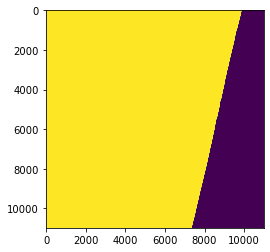

In [ ]:
plt.imshow(band[0])

In [18]:
meta

{'driver': 'ENVI',
 'dtype': 'uint16',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 7,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

In [1]:
from tifffile import tifffile

In [3]:
img = tifffile.imread('N:/dataorg-datasets/sentinel2_images/images_danya/geotiff/L2A_T43SFR_A023740_20200108T054215.tiff')

TiffFileError: not a TIFF file

### Generate .geojson file

In [19]:
import geojson

In [20]:
point = geojson.Point((-115.81, 37.24))

features = []
features.append(geojson.Feature(geometry=point, properties={"country": "Spain"}))

# add more features...
# features.append(...)

feature_collection = geojson.FeatureCollection(features)

with open('myfile.geojson', 'w') as f:
    geojson.dump(feature_collection, f)

In [21]:
feature_collection

{"features": [{"geometry": {"coordinates": [-115.81, 37.24], "type": "Point"}, "properties": {"country": "Spain"}, "type": "Feature"}], "type": "FeatureCollection"}

In [25]:
polygon = geojson.Polygon([[(2.38, 57.322), (23.194, -20.28), (-120.43, 19.15), (2.38,   57.322)]])
features = []
features.append(geojson.Feature(geometry=polygon, properties={"tile": "43SFR"}))
feature_collection = geojson.FeatureCollection(features)
feature_collection


{"features": [{"geometry": {"coordinates": [[[2.38, 57.322], [23.194, -20.28], [-120.43, 19.15], [2.38, 57.322]]], "type": "Polygon"}, "properties": {"tile": "43SFR"}, "type": "Feature"}], "type": "FeatureCollection"}

### Others

Download data using wget

In [1]:
import os

In [4]:
url1 = "https://scihub.copernicus.eu/dhus/odata/v1/Products('22e7af63-07ad-4076-8541-f6655388dc5e')/\$value"

In [6]:
url2 = "https://scihub.copernicus.eu/dhus/odata/v1/Products('2b17b57d-fff4-4645-b539-91f305c27c69')/$value"

In [5]:
url3 = "https://scihub.copernicus.eu/dhus/odata/v1/Products('2aa207f9-608c-4548-b992-2c47bcd5793c')/$value"

In [6]:
os.system(f'wget  --content-disposition --continue --user=danyayay --password=Ldy19970722 "{url3}"')

0

In [ ]:
https://scihub.copernicus.eu/dhus/odata/v1/Products('2aa207f9-608c-4548-b992-2c47bcd5793c')</id><title type="text">S2A_MSIL2A_20201220T053231_N0214_R105_T43SFR_20201220T075655</title><updated>2021-07-23T19:19:53.987Z</updated><category term="DHuS.Product" scheme="http://schemas.microsoft.com/ado/2007/08/dataservices/scheme"/><link href="Products(&apos;2aa207f9-608c-4548-b992-2c47bcd5793c&apos;)" rel="edit" title="Product"/>

In [ ]:
https://scihub.copernicus.eu/dhus/odata/v1/Products('2c50ca48-661e-4163-ba0a-902c4811cf09')/Online/$value

In [ ]:
https://scihub.copernicus.eu/dhus/odata/v1/Products('2c50ca48-661e-4163-ba0a-902c4811cf09')/$value

In [ ]:
https://scihub.copernicus.eu/dhus/odata/v1/Products('2c50ca48-661e-4163-ba0a-902c4811cf09')/Nodes('S2A_MSIL1C_20200603T052651_N0209_R105_T43SFR_20200603T091952.SAFE')/Nodes('manifest.safe')/$value

In [ ]:
https://scihub.copernicus.eu/dhus/odata/v1/Products('0a91217c-c602-471c-bda1-4926af39840f')/Nodes('S2A_MSIL1C_20210509T052651_N0300_R105_T43SFR_20210509T074019.SAFE')/Nodes('GRANULE')/$value

good

In [ ]:
https://scihub.copernicus.eu/dhus/odata/v1/Products('2b17b57d-fff4-4645-b539-91f305c27c69')/Nodes('S1A_IW_SLC__1SDV_20160117T103451_20160117T103518_009533_00DD94_D46A.SAFE')/Nodes('manifest.safe')/$value

In [ ]:
https://scihub.copernicus.eu/dhus/odata/v1/Products('ac8b1986-73e7-4ed2-b21a-8cfefead7e7b')/$value

In [ ]:
https://scihub.copernicus.eu/dhus/odata/v1/Products('ac8b1986-73e7-4ed2-b21a-8cfefead7e7b')/Nodes('S2A_MSIL1C_20210601T053641_N0300_R005_T43SFR_20210601T074909.SAFE')/Nodes('manifest.safe')/$value

In [ ]:
https://scihub.copernicus.eu/dhus/odata/v1/Products('8bd3bef3-6a11-4111-ba87-fd3004ed47fd')/Nodes('S2B_MSIL2A_20210523T210019_N0300_R100_T07WDQ_20210523T234058.SAFE')/Nodes('manifest.safe')/$value

Download using urllib

In [7]:
import urllib

In [9]:
# create a password manager
password_mgr = urllib.request.HTTPPasswordMgrWithDefaultRealm()

# Add the username and password.
# If we knew the realm, we could use it instead of None.
top_level_url = "https://scihub.copernicus.eu"
password_mgr.add_password(None, top_level_url, 'danyayay', 'Ldy19970722')

handler = urllib.request.HTTPBasicAuthHandler(password_mgr)

# create "opener" (OpenerDirector instance)
opener = urllib.request.build_opener(handler)

# use the opener to fetch a URL
a_url = top_level_url + "/dhus/odata/v1/Products('16241b12-cce4-4bf4-8e55-5a790134a1d0')/$value"
opener.open(a_url)

# Install the opener.
# Now all calls to urllib.request.urlopen use our opener.
urllib.request.install_opener(opener)

In [10]:
import requests

In [11]:
theurl= 'https://scihub.copernicus.eu/dhus/odata/v1/Products('16241b12-cce4-4bf4-8e55-5a790134a1d0')/$value'
username = 'myUsername'
password = 'myPassword'

r=requests.get(theurl, auth=requests.auth.HTTPBasicAuth(username, password))

MissingSchema: Invalid URL 'myLink_queriedResult/result.xls': No schema supplied. Perhaps you meant http://myLink_queriedResult/result.xls?